In [1]:
import os
os.chdir('/cluster/medbow/project/phangs/tjuchau/') #TJ change working directory to be the parent directory
from Py_files.Functions import *
image_files, filter_files = collect_M51_image_and_filter_files(filter_directory, image_directory)


/home/tjuchau/.conda/envs/TaylorJ/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Some functions use pre-defined data files, a warning will print when this is the case.
Current default filter data directory /project/phangs/tjuchau/Data_files/Filters/JWST_filters/
Current default image directory /project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/
Wavelength-sorted lists of files saved to variables 'filter_files' and 'image_files'
Regenerate sorted lists using 'image_files, filter_files = generate_list_of_files(filter_directory, image_directory)'
JWST filter mean wavelengths stored as dictionary, called using jwst_means["F115W"]
JWST filter pivot wavelengths stored as dictionary, called using jwst_pivots["F115W"]


In [2]:


full_raw_ifu_files_loc0 = ['/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g140m-f100lp_s3d_trimmed.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g235m-f170lp_s3d_trimmed.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g395m-f290lp_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_0/Arm1_Level3_ch1-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_0/Arm1_Level3_ch2-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_0/Arm1_Level3_ch3-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_0/Arm1_Level3_ch4-shortmediumlong_s3d_trimmed.fits']
full_raw_ifu_files_loc1 = ['/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g140m-f100lp_s3d_trimmed.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g395m-f290lp_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_1/Arm2_Level3_ch1-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_1/Arm2_Level3_ch2-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_1/Arm2_Level3_ch3-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_1/Arm2_Level3_ch4-shortmediumlong_s3d_trimmed.fits']
#TJ location 2 also within loc1 files
full_raw_ifu_files_loc3 = ['/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g140m-f100lp_s3d_trimmed.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g235m-f170lp_s3d_trimmed.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g395m-f290lp_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_3/Arm3_Level3_ch1-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_3/Arm3_Level3_ch2-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_3/Arm3_Level3_ch3-shortmediumlong_s3d.fits',
              '/project/phangs/tjuchau/Data_files/M51/Spectroscopy/raw_IFUs/location_3/Arm3_Level3_ch4-shortmediumlong_s3d_trimmed.fits']

In [3]:
#Ip25 = create_data(full_raw_ifu_files_loc0, image_files, filter_files, locations[0], 1.25*u.arcsec)
#plot_results(Ip25, correction = 'mult')
#plot_results(Ip25, correction = 'add')

In [4]:
collect_M51_image_and_filter_files(filter_directory, image_directory)

(array(['/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f115w_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f140m_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f150w_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f164n_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f182m_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f187n_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f200w_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f210m_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/v0p3p2/ngc5194_nircam_lv3_f212n_i2d_anchor.fits',
        '/project/phangs/tjuchau/Data_files/M51/Images/

***********************************************************************************************************************
now using psf size 1.0
***********************************************************************************************************************
adjusting spectra using additive and multiplicative corrections
adjusted 1 of 7
adjusted 2 of 7
adjusted 3 of 7
No filters entirely within '/project/phangs/tjuchau/Data_files/misc_data/temp_outputs/testing_convolutions3.fits
No filters entirely within '/project/phangs/tjuchau/Data_files/misc_data/temp_outputs/testing_convolutions3.fits
adjusted 4 of 7
adjusted 5 of 7
adjusted 6 of 7
No filters entirely within '/project/phangs/tjuchau/Data_files/misc_data/temp_outputs/testing_convolutions6.fits
No filters entirely within '/project/phangs/tjuchau/Data_files/misc_data/temp_outputs/testing_convolutions6.fits
adjusted 7 of 7
calculating additive corrected synthetic photometry...
wavelengths:  [<Quantity [9.70318029e-07, 9.70954029e-

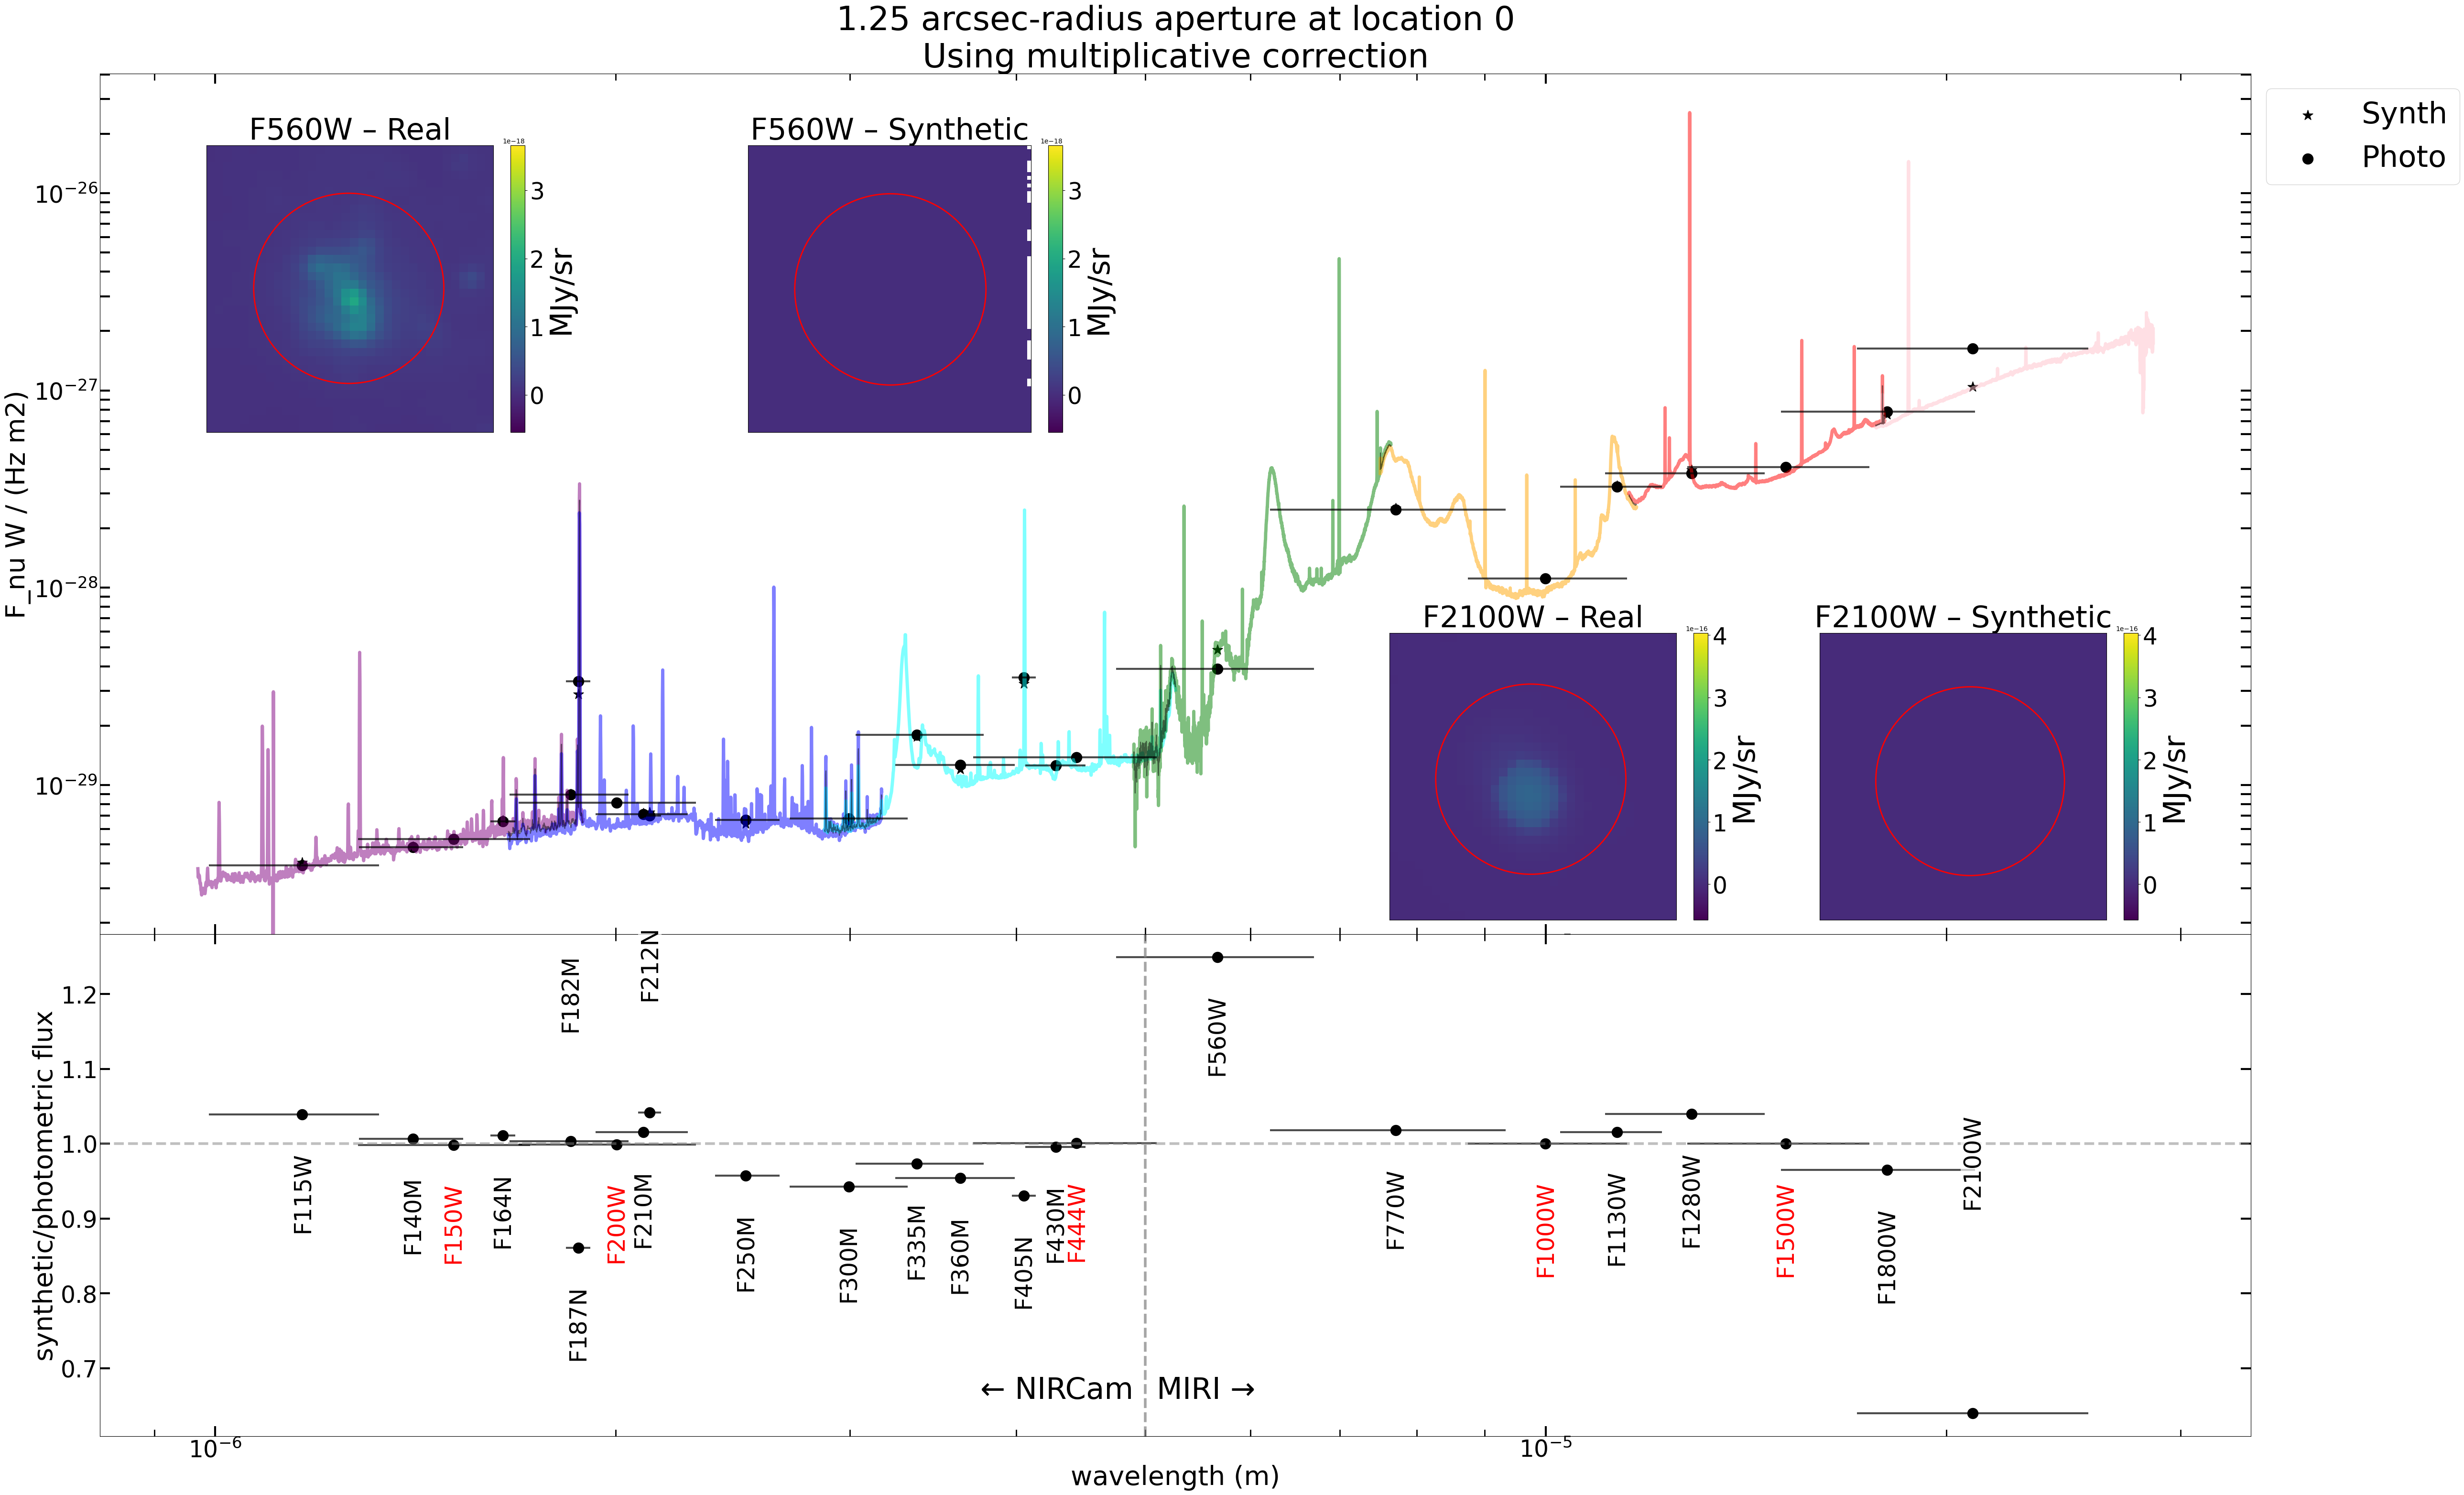

MJy / sr
real image_units MJy/sr
MJy / sr
real image_units MJy/sr
mean ratio :  0.9922357531566496
ratio std :  0.1009844667350792


TypeError: only dimensionless scalar quantities can be converted to Python scalars

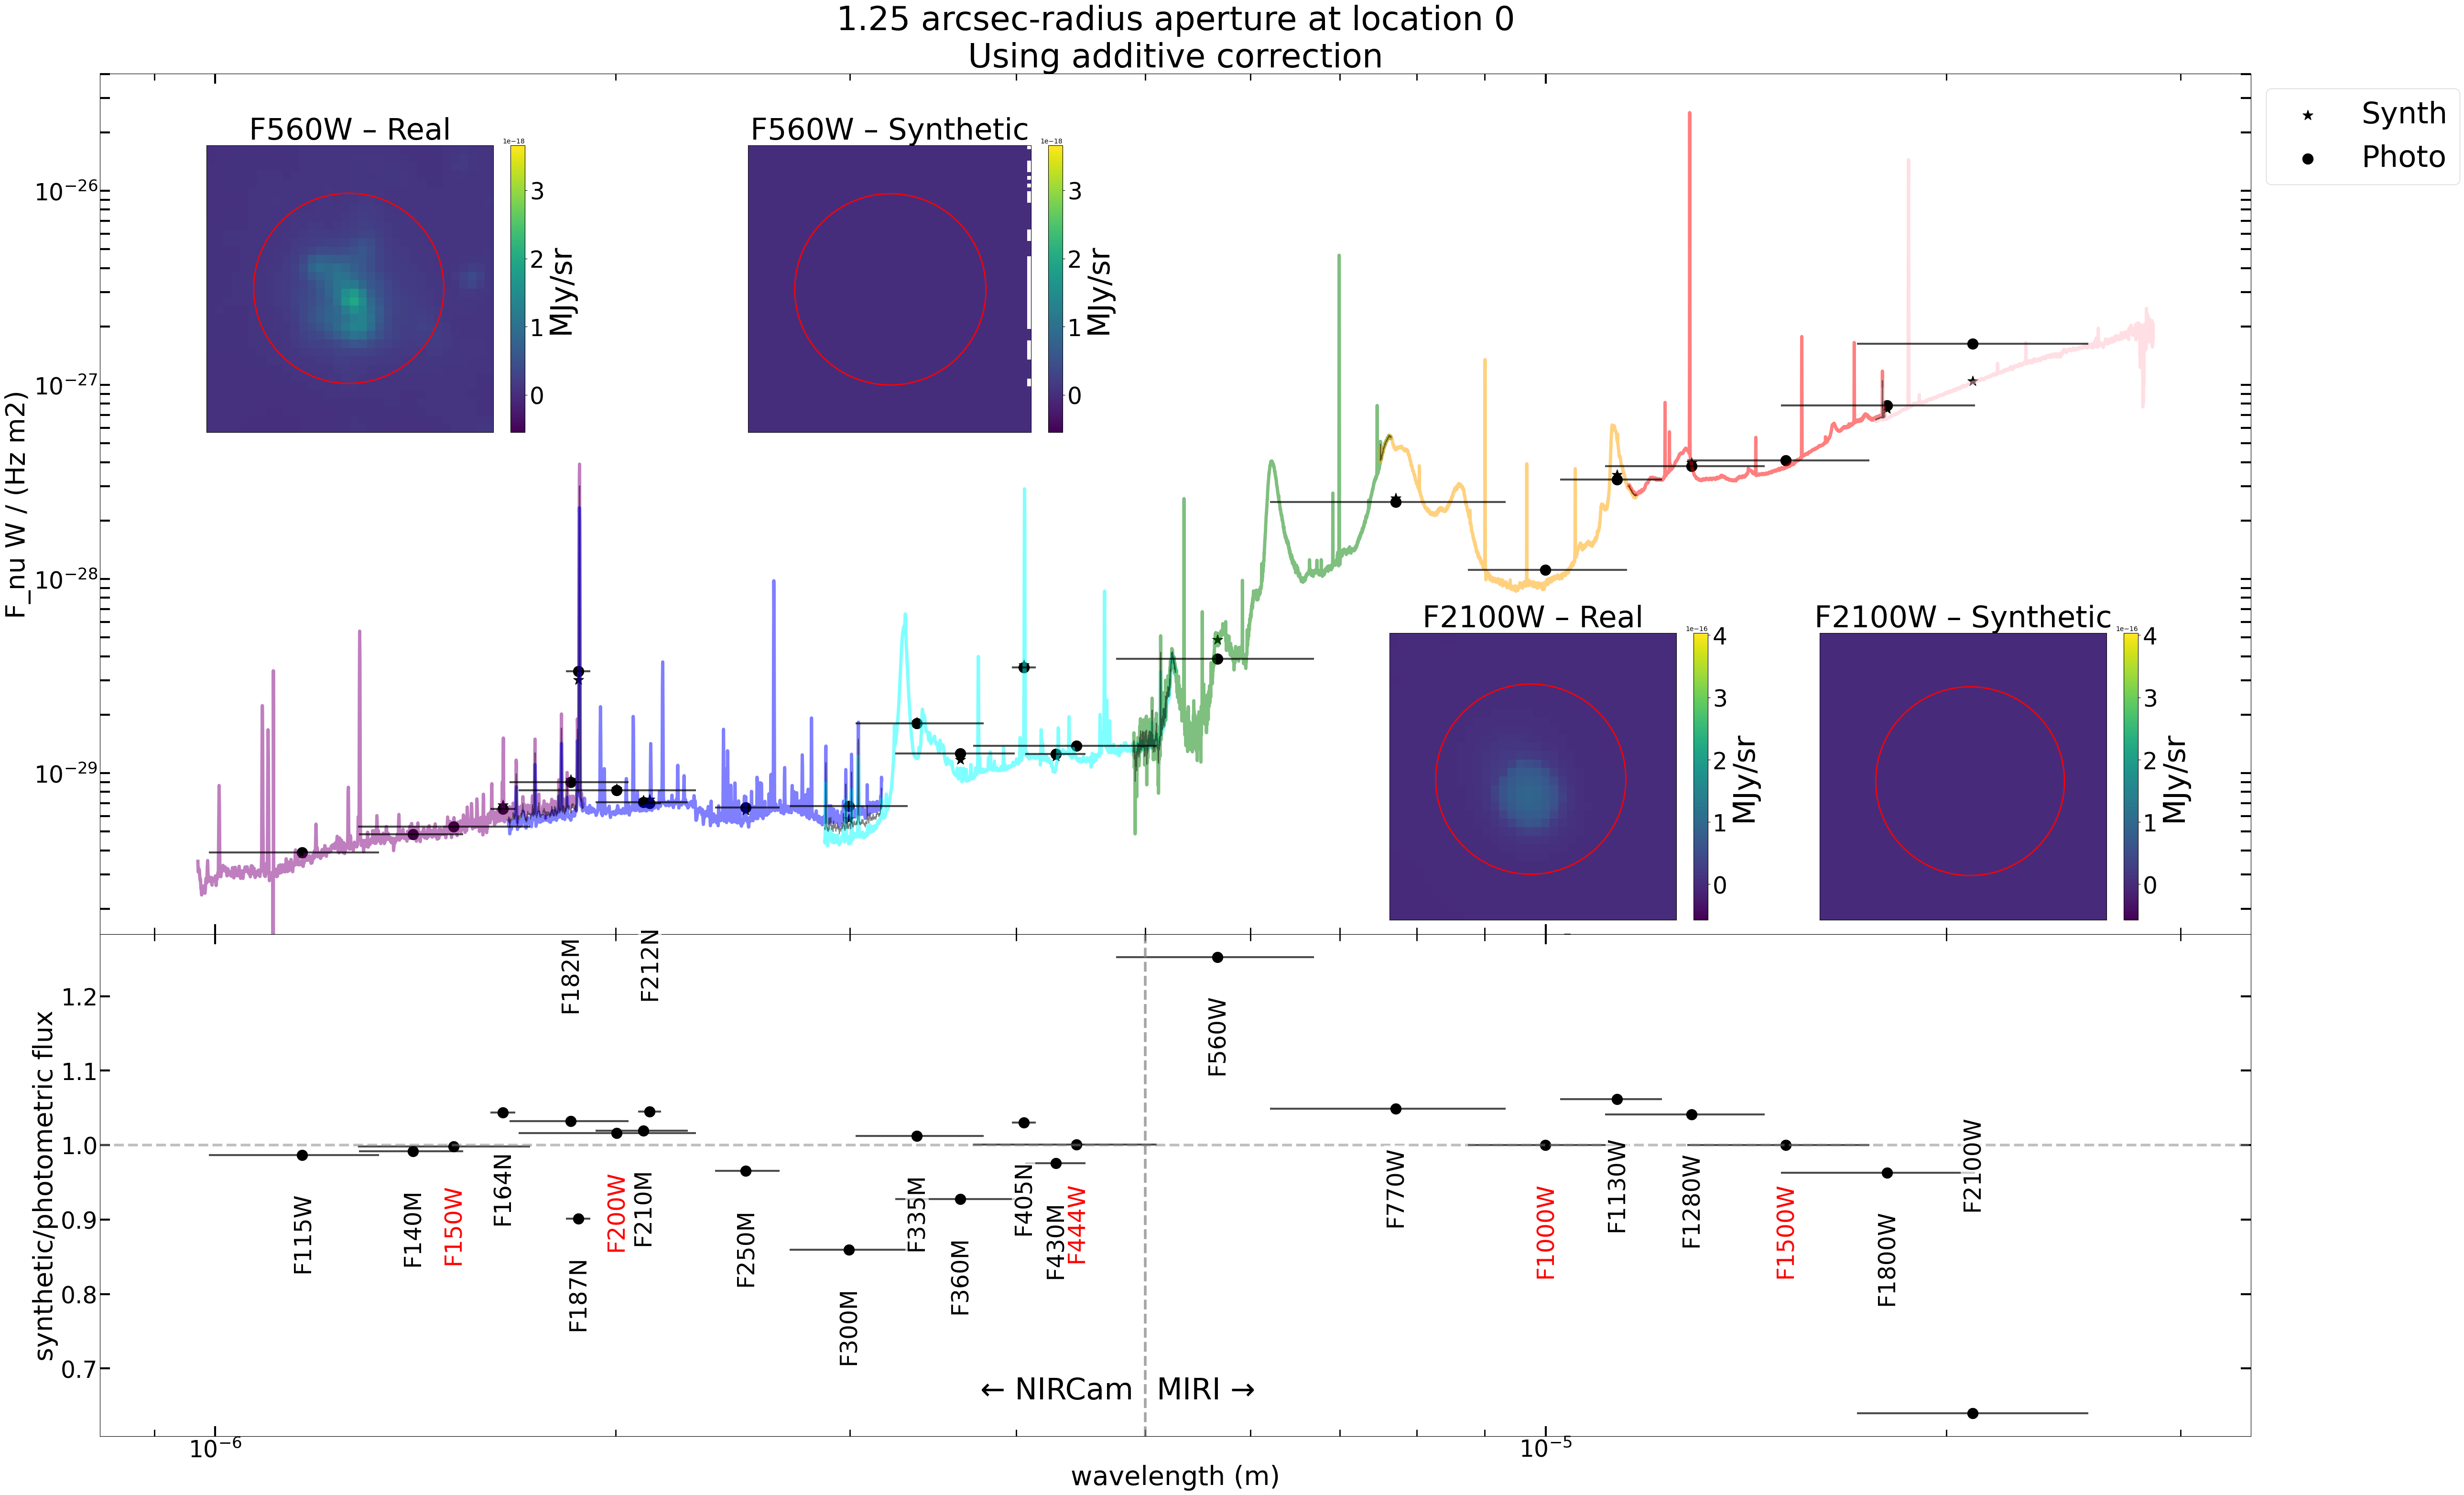

In [5]:
psf_sizes = np.linspace(1, 5, 11)
mean_add_correction_factors = []
mean_mult_correction_factors = []
for psf_size in psf_sizes:
    if psf_size == 0:
        psf_size = 1e-6
    print('***********************************************************************************************************************')
    print(f'now using psf size {psf_size}')
    print('***********************************************************************************************************************')
    psf = generate_psf(psf_type="gaussian", fwhm_pix=psf_size, size=61)
    new_ifus = []
    for i,file in enumerate(full_raw_ifu_files_loc0):
        new_file = convolve_ifu_cube(ifu_fits_path=file, psf=psf, output_path=f"/project/phangs/tjuchau/Data_files/misc_data/temp_outputs/testing_convolutions{i}.fits")
        new_ifus.append(new_file)
    data = compare_photometry(new_ifus, image_files, filter_files, locations[0], 1.25*u.arcsec)
    mean_add_correction_factors.append(data['add_correction_values'])
    mean_mult_correction_factors.append(data['mult_correction_values'])
    plot_results(data, correction = 'mult', show_images=['F560W', 'F2100W'])
    plot_results(data, correction = 'add', show_images=['F560W', 'F2100W'])

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:
psf_sizes = np.linspace(1, 5, 11)
mean_add_correction_factors = []
mean_mult_correction_factors = []
for psf_size in psf_sizes:
    if psf_size == 0:
        psf_size = 1e-6
    print('***********************************************************************************************************************')
    print(f'now using psf size {psf_size}')
    print('***********************************************************************************************************************')
    psf = generate_psf(psf_type="gaussian", fwhm_pix=psf_size, size=61)
    new_ifus = []
    for i,file in enumerate(full_raw_ifu_files_loc0):
        new_file = convolve_ifu_cube(ifu_fits_path=file, psf=psf, output_path=f"Data_files/misc_data/temp_outputs/testing_convolutions{i}.fits")
        new_ifus.append(new_file)
    data = create_data(new_ifus, image_files, filter_files, locations[0], 1*u.arcsec)
    mean_add_correction_factors.append(data['add_correction_values'])
    mean_mult_correction_factors.append(data['mult_correction_values'])
    plot_results(data, correction = 'mult', show_images=['F560W', 'F1500W'])
    plot_results(data, correction = 'add', show_images=['F560W', 'F1500W'])

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:
psf_sizes = np.linspace(1, 5, 11)
mean_add_correction_factors = []
mean_mult_correction_factors = []
for psf_size in psf_sizes:
    if psf_size == 0:
        psf_size = 1e-6
    print('***********************************************************************************************************************')
    print(f'now using psf size {psf_size}')
    print('***********************************************************************************************************************')
    psf = generate_psf(psf_type="gaussian", fwhm_pix=psf_size, size=61)
    new_ifus = []
    for i,file in enumerate(full_raw_ifu_files_loc0):
        new_file = convolve_ifu_cube(ifu_fits_path=file, psf=psf, output_path=f"Data_files/misc_data/test_data/testing_convolutions{i}.fits")
        new_ifus.append(new_file)
    data = create_data(new_ifus, image_files, filter_files, locations[0], 0.75*u.arcsec)
    mean_add_correction_factors.append(data['add_correction_values'])
    mean_mult_correction_factors.append(data['mult_correction_values'])
    plot_results(data, correction = 'mult', show_images=['F560W', 'F1500W'])
    plot_results(data, correction = 'add', show_images=['F560W', 'F1500W'])

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:
psf_sizes = np.linspace(1, 5, 11)
mean_add_correction_factors = []
mean_mult_correction_factors = []
for psf_size in psf_sizes:
    if psf_size == 0:
        psf_size = 1e-6
    print('***********************************************************************************************************************')
    print(f'now using psf size {psf_size}')
    print('***********************************************************************************************************************')
    psf = generate_psf(psf_type="gaussian", fwhm_pix=psf_size, size=61)
    new_ifus = []
    for i,file in enumerate(full_raw_ifu_files_loc0):
        new_file = convolve_ifu_cube(ifu_fits_path=file, psf=psf, output_path=f"Data_files/misc_data/test_data/testing_convolutions{i}.fits")
        new_ifus.append(new_file)
    data = create_data(new_ifus, image_files, filter_files, locations[0], 0.5*u.arcsec)
    mean_add_correction_factors.append(data['add_correction_values'])
    mean_mult_correction_factors.append(data['mult_correction_values'])
    plot_results(data, correction = 'mult', show_images=['F560W', 'F1500W'])
    plot_results(data, correction = 'add', show_images=['F560W', 'F1500W'])

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################



In [ ]:
colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:
psf_sizes = np.linspace(1, 5, 11)
mean_add_correction_factors = []
mean_mult_correction_factors = []
for psf_size in psf_sizes:
    if psf_size == 0:
        psf_size = 1e-6
    print('***********************************************************************************************************************')
    print(f'now using psf size {psf_size}')
    print('***********************************************************************************************************************')
    psf = generate_psf(psf_type="gaussian", fwhm_pix=psf_size, size=61)
    new_ifus = []
    for i,file in enumerate(full_raw_ifu_files_loc1):
        new_file = convolve_ifu_cube(ifu_fits_path=file, psf=psf, output_path=f"Data_files/misc_data/test_data/testing_convolutions{i}.fits")
        new_ifus.append(new_file)
    data = create_data(new_ifus, image_files, filter_files, locations[1], 1*u.arcsec)
    mean_add_correction_factors.append(data['add_correction_values'])
    mean_mult_correction_factors.append(data['mult_correction_values'])
    plot_results(data, correction = 'mult', show_images=['F560W', 'F1500W'])
    plot_results(data, correction = 'add', show_images=['F560W', 'F1500W'])

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:

def convolve_fits_with_gaussian_psf(
    input_fits_path,
    fwhm_arcsec,
    output_fits_path,
    location=None,
    radius_arcsec=None,
    psf_size_factor=6,
    boundary="fill",
    overwrite=True
):
    """
    Convolve a FITS image or cube with a Gaussian PSF.
    For 2D images, optionally crop a region around `location` to reduce memory.

    Parameters
    ----------
    input_fits_path : str
        Path to input FITS (2D image or 3D cube).
    fwhm_arcsec : float
        PSF FWHM in arcseconds.
    output_fits_path : str
        Output FITS path.
    location : SkyCoord or list/tuple [RA_deg, Dec_deg], optional
        Location to crop around for 2D images. If None, use full image.
    radius_arcsec : float, optional
        Minimum radius around location to include (in arcseconds). PSF must fit inside.
    psf_size_factor : float
        Kernel size = psf_size_factor * FWHM (in pixels)
    boundary : str
        FFT boundary handling.
    overwrite : bool
        Overwrite output file.

    Returns
    -------
    output_fits_path : str
    """
    # ----------------------------
    # Load FITS
    # ----------------------------
    with fits.open(input_fits_path) as hdul:
        data = hdul['SCI'].data.astype(float)
        header = hdul['SCI'].header

    if data is None:
        raise ValueError("FITS contains no data.")

    wcs = WCS(header)

    # ----------------------------
    # Convert location to pixel coordinates
    # ----------------------------
    if type(location) == list:
        spatial_coords = SkyCoord(ra=location[0]*u.deg, dec=location[1]*u.deg)
    elif type(location) == SkyCoord:
        spatial_coords = location
    else:
        print('loc is not a list of ra, dec and it is not a SkyCoord object.')
        return None
    
    # Convert spatial coordinates to pixels
    x0, y0 = wcs.celestial.all_world2pix(spatial_coords.ra.deg, 
                                      spatial_coords.dec.deg, 0)
    x0 = float(x0)
    y0 = float(y0)

    # ----------------------------
    # Pixel scale (arcsec/pix)
    # ----------------------------
    pixscale_arcsec = abs(header['CDELT1']) * 3600.0

    # ----------------------------
    # Convert FWHM to sigma (pixels)
    # ----------------------------
    fwhm_pix = fwhm_arcsec / pixscale_arcsec
    sigma_pix = fwhm_pix / (2.0 * np.sqrt(2.0 * np.log(2.0)))

    # ----------------------------
    # Build PSF kernel
    # ----------------------------
    psf_size_pix = int(np.ceil(psf_size_factor * fwhm_pix))
    if psf_size_pix % 2 == 0:
        psf_size_pix += 1

    ax = np.arange(psf_size_pix) - psf_size_pix // 2
    xx, yy = np.meshgrid(ax, ax)
    psf = np.exp(-(xx**2 + yy**2) / (2 * sigma_pix**2))
    psf /= psf.sum()

    # ----------------------------
    # Handle NaNs
    # ----------------------------
    nanmask = np.isnan(data)
    data0 = data.copy()
    data0[nanmask] = 0.0
    weight = np.ones_like(data0)
    weight[nanmask] = 0.0

    # ----------------------------
    # Crop region for 2D images if requested
    # ----------------------------
    if data.ndim == 2 and location is not None and radius_arcsec is not None:
        radius_pix = max(radius_arcsec / pixscale_arcsec, 1.0)  # minimum 1 px
        cut_radius = int(np.ceil(radius_pix + 6 * sigma_pix))

        x_min = max(0, int(x0 - cut_radius))
        x_max = min(data.shape[1], int(x0 + cut_radius + 1))
        y_min = max(0, int(y0 - cut_radius))
        y_max = min(data.shape[0], int(y0 + cut_radius + 1))

        data0_cut = data0[y_min:y_max, x_min:x_max]
        weight_cut = weight[y_min:y_max, x_min:x_max]
        nanmask_cut = nanmask[y_min:y_max, x_min:x_max]

        def convolve_img(img, wgt):
            conv_img = convolve_fft(
                img,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=False
            )
            conv_wgt = convolve_fft(
                wgt,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=False
            )
            out = np.zeros_like(conv_img)
            good = conv_wgt > 1e-8
            out[good] = conv_img[good] / conv_wgt[good]
            out[~good] = np.nan
            return out

        conv_cut = convolve_img(data0_cut, weight_cut)
        conv_cut[nanmask_cut] = np.nan
        conv = data.copy()
        conv[y_min:y_max, x_min:x_max] = conv_cut

    # ----------------------------
    # Otherwise, use full data (2D) or 3D cubes
    # ----------------------------
    elif data.ndim == 2:
        def convolve_img(img, wgt):
            conv_img = convolve_fft(
                img,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            conv_wgt = convolve_fft(
                wgt,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            out = np.zeros_like(conv_img)
            good = conv_wgt > 1e-8
            out[good] = conv_img[good] / conv_wgt[good]
            out[~good] = np.nan
            return out

        conv = convolve_img(data0, weight)
        conv[nanmask] = np.nan

    elif data.ndim == 3:
        conv = np.zeros_like(data0)
        for i in range(data.shape[0]):
            conv_i = convolve_fft(
                data0[i],
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            conv_wgt = convolve_fft(
                weight[i],
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            good = conv_wgt > 1e-8
            out_i = np.zeros_like(conv_i)
            out_i[good] = conv_i[good] / conv_wgt[good]
            out_i[~good] = np.nan
            out_i[nanmask[i]] = np.nan
            conv[i] = out_i
    else:
        raise ValueError(f"Unsupported data dimension: {data.ndim}")

    # ----------------------------
    # Write output
    # ----------------------------
    hdu = fits.PrimaryHDU(conv, header=header)
    hdu.writeto(output_fits_path, overwrite=overwrite)

    return output_fits_path


    
psf_sizes = np.linspace(0.1, 1, 4)
mean_add_correction_factors = []
mean_mult_correction_factors = []
for psf_size in psf_sizes:
    if psf_size == 0:
        psf_size = 1e-6
    print('***********************************************************************************************************************')
    print(f'now using psf size {psf_size}')
    print('***********************************************************************************************************************')
    new_ifus = []

    for i,file in enumerate(full_raw_ifu_files_loc0):
        new_file = convolve_fits_with_gaussian_psf(file, psf_size,
                                                   f"Data_files/misc_data/test_data/testing_convolutions{i}.fits", 
                                                   location = locations[0],
                                                  radius_arcsec = 1.25)
        new_ifus.append(new_file)
    data = create_data(new_ifus, image_files, filter_files, locations[0], 1.25*u.arcsec)
    mean_add_correction_factors.append(data['add_correction_values'])
    mean_mult_correction_factors.append(data['mult_correction_values'])
    plot_results(data, correction = 'mult', show_images=['F560W', 'F2100W'])
    plot_results(data, correction = 'add', show_images=['F560W', 'F2100W'])

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from astropy.io import fits
from astropy.convolution import convolve_fft
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

def convolve_fits_with_gaussian_psf(
    input_fits_path,
    fwhm_arcsec,
    output_fits_path,
    location=None,
    radius_arcsec=None,
    psf_size_factor=6,
    boundary="fill",
    overwrite=True
):
    """
    Convolve a FITS image or cube with a Gaussian PSF.
    For 2D images, optionally crop a region around `location` to reduce memory.

    Parameters
    ----------
    input_fits_path : str
        Path to input FITS (2D image or 3D cube).
    fwhm_arcsec : float
        PSF FWHM in arcseconds.
    output_fits_path : str
        Output FITS path.
    location : SkyCoord or list/tuple [RA_deg, Dec_deg], optional
        Location to crop around for 2D images. If None, use full image.
    radius_arcsec : float, optional
        Minimum radius around location to include (in arcseconds). PSF must fit inside.
    psf_size_factor : float
        Kernel size = psf_size_factor * FWHM (in pixels)
    boundary : str
        FFT boundary handling.
    overwrite : bool
        Overwrite output file.

    Returns
    -------
    output_fits_path : str
    """
    # ----------------------------
    # Load FITS
    # ----------------------------
    with fits.open(input_fits_path) as hdul:
        data = hdul['SCI'].data.astype(float)
        header = hdul['SCI'].header

    if data is None:
        raise ValueError("FITS contains no data.")

    wcs = WCS(header)

    # ----------------------------
    # Convert location to pixel coordinates
    # ----------------------------
    if type(location) == list:
        spatial_coords = SkyCoord(ra=location[0]*u.deg, dec=location[1]*u.deg)
    elif type(location) == SkyCoord:
        spatial_coords = location
    else:
        print('loc is not a list of ra, dec and it is not a SkyCoord object.')
        return None
    
    # Convert spatial coordinates to pixels
    x0, y0 = wcs.celestial.all_world2pix(spatial_coords.ra.deg, 
                                      spatial_coords.dec.deg, 0)
    x0 = float(x0)
    y0 = float(y0)

    # ----------------------------
    # Pixel scale (arcsec/pix)
    # ----------------------------
    pixscale_arcsec = abs(header['CDELT1']) * 3600.0

    # ----------------------------
    # Convert FWHM to sigma (pixels)
    # ----------------------------
    fwhm_pix = fwhm_arcsec / pixscale_arcsec
    sigma_pix = fwhm_pix / (2.0 * np.sqrt(2.0 * np.log(2.0)))

    # ----------------------------
    # Build PSF kernel
    # ----------------------------
    psf_size_pix = int(np.ceil(psf_size_factor * fwhm_pix))
    if psf_size_pix % 2 == 0:
        psf_size_pix += 1

    ax = np.arange(psf_size_pix) - psf_size_pix // 2
    xx, yy = np.meshgrid(ax, ax)
    psf = np.exp(-(xx**2 + yy**2) / (2 * sigma_pix**2))
    psf /= psf.sum()

    # ----------------------------
    # Handle NaNs
    # ----------------------------
    nanmask = np.isnan(data)
    data0 = data.copy()
    data0[nanmask] = 0.0
    weight = np.ones_like(data0)
    weight[nanmask] = 0.0

    # ----------------------------
    # Crop region for 2D images if requested
    # ----------------------------
    if data.ndim == 2 and location is not None and radius_arcsec is not None:
        radius_pix = max(radius_arcsec / pixscale_arcsec, 1.0)  # minimum 1 px
        cut_radius = int(np.ceil(radius_pix + 6 * sigma_pix))

        x_min = max(0, int(x0 - cut_radius))
        x_max = min(data.shape[1], int(x0 + cut_radius + 1))
        y_min = max(0, int(y0 - cut_radius))
        y_max = min(data.shape[0], int(y0 + cut_radius + 1))

        data0_cut = data0[y_min:y_max, x_min:x_max]
        weight_cut = weight[y_min:y_max, x_min:x_max]
        nanmask_cut = nanmask[y_min:y_max, x_min:x_max]

        def convolve_img(img, wgt):
            conv_img = convolve_fft(
                img,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=False
            )
            conv_wgt = convolve_fft(
                wgt,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=False
            )
            out = np.zeros_like(conv_img)
            good = conv_wgt > 1e-8
            out[good] = conv_img[good] / conv_wgt[good]
            out[~good] = np.nan
            return out

        conv_cut = convolve_img(data0_cut, weight_cut)
        conv_cut[nanmask_cut] = np.nan
        conv = data.copy()
        conv[y_min:y_max, x_min:x_max] = conv_cut

    # ----------------------------
    # Otherwise, use full data (2D) or 3D cubes
    # ----------------------------
    elif data.ndim == 2:
        def convolve_img(img, wgt):
            conv_img = convolve_fft(
                img,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            conv_wgt = convolve_fft(
                wgt,
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            out = np.zeros_like(conv_img)
            good = conv_wgt > 1e-8
            out[good] = conv_img[good] / conv_wgt[good]
            out[~good] = np.nan
            return out

        conv = convolve_img(data0, weight)
        conv[nanmask] = np.nan

    elif data.ndim == 3:
        conv = np.zeros_like(data0)
        for i in range(data.shape[0]):
            conv_i = convolve_fft(
                data0[i],
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            conv_wgt = convolve_fft(
                weight[i],
                psf,
                boundary=boundary,
                nan_treatment="fill",
                fill_value=0.0,
                normalize_kernel=False,
                preserve_nan=False,
                allow_huge=True
            )
            good = conv_wgt > 1e-8
            out_i = np.zeros_like(conv_i)
            out_i[good] = conv_i[good] / conv_wgt[good]
            out_i[~good] = np.nan
            out_i[nanmask[i]] = np.nan
            conv[i] = out_i
    else:
        raise ValueError(f"Unsupported data dimension: {data.ndim}")

    # ----------------------------
    # Write output
    # ----------------------------
    hdu = fits.PrimaryHDU(conv, header=header)
    hdu.writeto(output_fits_path, overwrite=overwrite)

    return output_fits_path


    
psf_sizes = np.linspace(0.1, 1.75, 20)
mean_add_correction_factors = []
mean_mult_correction_factors = []
for psf_size in psf_sizes:
    if psf_size == 0:
        psf_size = 1e-6
    print('***********************************************************************************************************************')
    print(f'now using psf size {psf_size}')
    print('***********************************************************************************************************************')
    new_images = []
    for i,file in enumerate(image_files):
        new_file = convolve_fits_with_gaussian_psf(file, psf_size, f"Data_files/misc_data/test_data/testing_convolutions{i}_{extract_filter_name(file)}.fits",
                                                   location = locations[0], radius_arcsec = 1.25)
        new_images.append(new_file)
    data = create_data(full_raw_ifu_files_loc0, new_images, filter_files, locations[0], 1.25*u.arcsec)
    mean_add_correction_factors.append(data['add_correction_values'])
    mean_mult_correction_factors.append(data['mult_correction_values'])
    plot_results(data, correction = 'mult', show_images=['F560W', 'F2100W'])
    plot_results(data, correction = 'add', show_images=['F560W', 'F2100W'])

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()


In [ ]:
import os
os.chdir('/d/ret1/Taylor/jupyter_notebooks/Research') #TJ change working directory to be the parent directory
from Py_files.Functions import *
image_files, filter_files = generate_list_of_files(filter_directory, image_directory)

karin_SDuval_IFU_files = ['Data_files/IFU_files/raw_IFUs/jw03435-o012_t014_nirspec_g140m-f100lp_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/jw03435-o012_t014_nirspec_g235m-f170lp_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/jw03435-o012_t014_nirspec_g395m-f290lp_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/SW_IFU_ch1-shortmediumlong_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/SW_IFU_ch2-shortmediumlong_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/SW_IFU_ch3-shortmediumlong_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/SW_IFU_ch4-shortmediumlong_s3d.fits'
            ]

karin_IFU_files = [ 'Data_files/IFU_files/raw_IFUs/jw03435-o012_t014_nirspec_g140m-f100lp_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/jw03435-o012_t014_nirspec_g235m-f170lp_s3d.fits',
             'Data_files/IFU_files/raw_IFUs/jw03435-o012_t014_nirspec_g395m-f290lp_s3d.fits',
             'Data_files/IFU_files/Arm2_Level3_ch1-shortmediumlong_s3d.fits',
             'Data_files/IFU_files/Arm2_Level3_ch2-shortmediumlong_s3d.fits',
             'Data_files/IFU_files/Arm2_Level3_ch3-shortmediumlong_s3d.fits',
             'Data_files/IFU_files/Arm2_Level3_ch4-shortmediumlong_s3d.fits',
            ]
Thomas_IFU_file = 'Data_files/IFU_files/M51_SW_f290lp_g395m-f290lp_s3d.fits'

SDuval_IFU_files = ['Data_files/IFU_files/raw_IFUs/SW_IFU_ch1-shortmediumlong_s3d.fits',
                  'Data_files/IFU_files/raw_IFUs/SW_IFU_ch2-shortmediumlong_s3d.fits',
                  'Data_files/IFU_files/raw_IFUs/SW_IFU_ch3-shortmediumlong_s3d.fits',
                  'Data_files/IFU_files/raw_IFUs/SW_IFU_ch4-shortmediumlong_s3d.fits']

Grant_conv_IFU_files = ['Data_files/IFU_files/jw03435-o012_t014_nirspec_g140m-f100lp_s3d_conv17p1.fits',
                        'Data_files/IFU_files/jw03435-o012_t014_nirspec_g235m-f170lp_s3d_conv17p1.fits',
                        'Data_files/IFU_files/jw03435-o012_t014_nirspec_g395m-f290lp_s3d_conv17p1.fits',
                        'Data_files/IFU_files/SW_IFU_ch1-shortmediumlong_s3d_conv17p1um.fits',
                        'Data_files/IFU_files/SW_IFU_ch2-shortmediumlong_s3d_conv17p1um.fits',
                        'Data_files/IFU_files/SW_IFU_ch3-shortmediumlong_s3d_conv17p1um.fits',
                        'Data_files/IFU_files/SW_IFU_ch4-shortmediumlong_s3d_conv17p1um.fits']

full_raw_ifu_files_loc0 = ['Data_files/IFU_files/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g140m-f100lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g235m-f170lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/jw03435-o004_t005_nirspec_g395m-f290lp_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch1-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch2-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch3-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_0/Arm1_Level3_ch4-shortmediumlong_s3d_trimmed.fits']
full_raw_ifu_files_loc1 = ['Data_files/IFU_files/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g140m-f100lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g235m-f170lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/jw03435-o012_t014_nirspec_g395m-f290lp_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch1-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch2-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch3-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_1/Arm2_Level3_ch4-shortmediumlong_s3d_trimmed.fits']
#TJ location 2 also within loc1 files
full_raw_ifu_files_loc3 = ['Data_files/IFU_files/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g140m-f100lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g235m-f170lp_s3d_trimmed.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/jw03435-o006_t010_nirspec_g395m-f290lp_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch1-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch2-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch3-shortmediumlong_s3d.fits',
              'Data_files/IFU_files/raw_IFUs/location_3/Arm3_Level3_ch4-shortmediumlong_s3d_trimmed.fits']


import numpy as np
from astropy.io import fits
from astropy.convolution import convolve_fft
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

import numpy as np
from astropy.io import fits
from astropy.convolution import convolve_fft
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

def native_psf_FWHM(wl):
    return (1.22*wl/6.5)*360*3600/(2*np.pi)

def psf_homogenize_jwst_fits(
    input_fits_path,
    fwhm_target_arcsec,
    output_fits_path,
    native_wavelength=None,    # only for 2D images
    location=None,               # SkyCoord or [ra,dec] deg, only for 2D
    radius_arcsec=1.0,           # only for 2D
    psf_size_factor=6,
    boundary="fill",
    overwrite=True,
):
    """
    PSF-homogenize JWST image or IFU cube to a common Gaussian PSF using
    diffraction-limited wavelength-dependent PSF estimation.

    For 3D cube:
        - Wavelength is read from WCS
        - Native PSF computed per slice

    For 2D image:
        - You must supply native_wavelength_m
        - You must supply location + radius_arcsec (for cutout convolution)
    """

    # ----------------------------
    # Load FITS
    # ----------------------------
    with fits.open(input_fits_path) as hdul:
        data = hdul['SCI'].data.astype(float)
        header = hdul['SCI'].header

    wcs = WCS(header)
    pixscale_arcsec = abs(header['CDELT1']) * 3600.0

    # ----------------------------
    # Masked convolution helper
    # ----------------------------
    def masked_convolve(img, psf):
        nanmask = np.isnan(img)
        img0 = img.copy()
        img0[nanmask] = 0.0

        wgt = np.ones_like(img0)
        wgt[nanmask] = 0.0

        conv_img = convolve_fft(
            img0, psf,
            boundary=boundary,
            nan_treatment="fill",
            fill_value=0.0,
            normalize_kernel=False,
            preserve_nan=False,
            allow_huge=False,
        )

        conv_wgt = convolve_fft(
            wgt, psf,
            boundary=boundary,
            nan_treatment="fill",
            fill_value=0.0,
            normalize_kernel=False,
            preserve_nan=False,
            allow_huge=False,
        )

        out = np.full_like(conv_img, np.nan)
        good = conv_wgt > 1e-8
        out[good] = conv_img[good] / conv_wgt[good]
        return out

    # ----------------------------
    # Build Gaussian kernel
    # ----------------------------
    def make_kernel_from_fwhm(fwhm_arcsec):
        if fwhm_arcsec <= 0:
            return None

        fwhm_pix = fwhm_arcsec / pixscale_arcsec
        sigma_pix = fwhm_pix / (2.0 * np.sqrt(2.0 * np.log(2.0)))

        size = int(np.ceil(psf_size_factor * fwhm_pix))
        if size % 2 == 0:
            size += 1

        ax = np.arange(size) - size // 2
        xx, yy = np.meshgrid(ax, ax)
        psf = np.exp(-(xx**2 + yy**2) / (2 * sigma_pix**2))
        psf /= psf.sum()
        return psf, sigma_pix

    # ============================
    # ========== 2D IMAGE =======
    # ============================
    if data.ndim == 2:
        if native_wavelength is None:
            raise ValueError("For 2D images you must supply native_wavelength_m.")
        if native_wavelength.unit != u.m:
            native_wavelength.to(u.m)
        if location is None:
            raise ValueError("For 2D images you must supply location.")
        if radius_arcsec is None:
            raise ValueError("For 2D images you must supply radius_arcsec.")
        native_wavelength_m = native_wavelength.value
        # Convert location to pixel
        if isinstance(location, SkyCoord):
            x0, y0 = wcs.world_to_pixel(location)
        else:
            ra, dec = location
            x0, y0 = wcs.world_to_pixel(SkyCoord(ra=ra*u.deg, dec=dec*u.deg))
        x0 = float(x0)
        y0 = float(y0)

        # Native PSF
        fwhm_native = native_psf_FWHM(native_wavelength_m)

        if fwhm_native >= fwhm_target_arcsec:
            print("Native PSF is already worse than target PSF.")
            return input_fits_path

        fwhm_kernel = np.sqrt(fwhm_target_arcsec**2 - fwhm_native**2)
        psf, sigma_pix = make_kernel_from_fwhm(fwhm_kernel)

        # Compute cutout size
        radius_pix = radius_arcsec / pixscale_arcsec
        cut_radius = int(np.ceil(radius_pix + 6 * sigma_pix))

        x_min = max(0, int(x0 - cut_radius))
        x_max = min(data.shape[1], int(x0 + cut_radius + 1))
        y_min = max(0, int(y0 - cut_radius))
        y_max = min(data.shape[0], int(y0 + cut_radius + 1))

        sub = data[y_min:y_max, x_min:x_max]
        conv_sub = masked_convolve(sub, psf)

        out = data.copy()
        out[y_min:y_max, x_min:x_max] = conv_sub

    # ============================
    # ========== 3D CUBE ========
    # ============================
    elif data.ndim == 3:
        # Get wavelength axis from WCS
        # Assume axis 0 is spectral
        spec_pix = np.arange(data.shape[0])
        world = wcs.pixel_to_world_values(spec_pix, 0, 0)
        wavelengths_m = SpectralCube.read(input_fits_path, hdu = 'SCI').spectral_axis.to(u.m).value

        out = np.zeros_like(data)

        for i in range(data.shape[0]):
            lam = wavelengths_m[i]
            fwhm_native = native_psf_FWHM(lam)
            if fwhm_native >= fwhm_target_arcsec:
                out[i] = data[i]
                continue

            fwhm_kernel = np.sqrt(np.abs(fwhm_target_arcsec**2 - fwhm_native**2))
            psf, _ = make_kernel_from_fwhm(fwhm_kernel)

            out[i] = masked_convolve(data[i], psf)

    else:
        raise ValueError("Only 2D images or 3D cubes supported.")

    # ----------------------------
    # Write output
    # ----------------------------
    fits.PrimaryHDU(out, header=header).writeto(output_fits_path, overwrite=overwrite)
    return output_fits_path




##############################################################################################




psf_sizes = [native_psf_FWHM(13e-6), native_psf_FWHM(15e-6), native_psf_FWHM(17.04e-6), native_psf_FWHM(19e-6), native_psf_FWHM(21e-6)]
'''
add_correction_factors_cube1 = np.array([])
add_correction_factors_cube2 = np.array([])
add_correction_factors_cube3 = np.array([])
add_correction_factors_cube4 = np.array([])
add_correction_factors_cube5 = np.array([])
add_correction_factors_cube6 = np.array([])
add_correction_factors_cube7 = np.array([])

mult_correction_factors_cube1 = np.array([])
mult_correction_factors_cube2 = np.array([])
mult_correction_factors_cube3 = np.array([])
mult_correction_factors_cube4 = np.array([])
mult_correction_factors_cube5 = np.array([])
mult_correction_factors_cube6 = np.array([])
mult_correction_factors_cube7 = np.array([])
'''
loc_idx = 0

add_correction_factors_cube1 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube1_factors.npy')
add_correction_factors_cube2 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube2_factors.npy')
add_correction_factors_cube3 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube3_factors.npy')
add_correction_factors_cube4 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube4_factors.npy')
add_correction_factors_cube5 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube5_factors.npy')
add_correction_factors_cube6 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube6_factors.npy')
add_correction_factors_cube7 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube7_factors.npy')

mult_correction_factors_cube1 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube1_factors.npy')
mult_correction_factors_cube2 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube2_factors.npy')
mult_correction_factors_cube3 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube3_factors.npy')
mult_correction_factors_cube4 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube4_factors.npy')
mult_correction_factors_cube5 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube5_factors.npy')
mult_correction_factors_cube6 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube6_factors.npy')
mult_correction_factors_cube7 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube7_factors.npy')

radius = 1*u.arcsec
location = locations[0]
psf_size = psf_sizes[0]
#for psf_size in psf_sizes:
if psf_size == 0:
    psf_size = 1e-6
print('***********************************************************************************************************************')
print(f'now using psf size {psf_size}')
print('***********************************************************************************************************************')
new_images = []
for i,file in enumerate(image_files):
    print('convolving file: ', file)
    new_file = psf_homogenize_jwst_fits(file, psf_size, f"Data_files/misc_data/test_data/testing_convolutions{i}_{extract_filter_name(file)}_image.fits",
                                        native_wavelength = jwst_means[extract_filter_name(file)], 
                                        location = location, radius_arcsec = radius.value)
    new_images.append(new_file)
    
new_ifus = []
for i,file in enumerate(full_raw_ifu_files_loc0):
    print('convolving file: ', file)

    new_file = psf_homogenize_jwst_fits(file, psf_size, f"Data_files/misc_data/test_data/testing_convolutions{i}_ifu.fits",
                                        radius_arcsec = radius.value)
    new_ifus.append(new_file)
    

data = create_data(new_ifus, new_images, filter_files, locations[0], radius)


add_correction_factors_cube1 = np.append(add_correction_factors_cube1, data['add_correction_values'][0])
add_correction_factors_cube2 = np.append(add_correction_factors_cube2, data['add_correction_values'][1])
add_correction_factors_cube3 = np.append(add_correction_factors_cube3, data['add_correction_values'][2])
add_correction_factors_cube4 = np.append(add_correction_factors_cube4, data['add_correction_values'][3])
add_correction_factors_cube5 = np.append(add_correction_factors_cube5, data['add_correction_values'][4])
add_correction_factors_cube6 = np.append(add_correction_factors_cube6, data['add_correction_values'][5])
add_correction_factors_cube7 = np.append(add_correction_factors_cube7, data['add_correction_values'][6])
mult_correction_factors_cube1 = np.append(mult_correction_factors_cube1, data['mult_correction_values'][0])
mult_correction_factors_cube2 = np.append(mult_correction_factors_cube2, data['mult_correction_values'][1])
mult_correction_factors_cube3 = np.append(mult_correction_factors_cube3, data['mult_correction_values'][2])
mult_correction_factors_cube4 = np.append(mult_correction_factors_cube4, data['mult_correction_values'][3])
mult_correction_factors_cube5 = np.append(mult_correction_factors_cube5, data['mult_correction_values'][4])
mult_correction_factors_cube6 = np.append(mult_correction_factors_cube6, data['mult_correction_values'][5])
mult_correction_factors_cube7 = np.append(mult_correction_factors_cube7, data['mult_correction_values'][6])


plot_results(data, correction = 'mult', show_images=['F560W', 'F2100W'])
plot_results(data, correction = 'add', show_images=['F560W', 'F2100W'])


np.save(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube1_factors.npy', add_correction_factors_cube1)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube2_factors.npy', add_correction_factors_cube2)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube3_factors.npy', add_correction_factors_cube3)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube4_factors.npy', add_correction_factors_cube4)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube5_factors.npy', add_correction_factors_cube5)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube6_factors.npy', add_correction_factors_cube6)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube7_factors.npy', add_correction_factors_cube7)

np.save(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube1_factors.npy', mult_correction_factors_cube1)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube2_factors.npy', mult_correction_factors_cube2)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube3_factors.npy', mult_correction_factors_cube3)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube4_factors.npy', mult_correction_factors_cube4)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube5_factors.npy', mult_correction_factors_cube5)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube6_factors.npy', mult_correction_factors_cube6)
np.save(f'Data_files/misc_data/test_data/loc{loc_idx}mult_cube7_factors.npy', mult_correction_factors_cube7)


In [ ]:

colors = ['red', 'orange', 'green', 'blue', 'purple', 'black', 'cyan']
for i, factors in enumerate(mean_add_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1
for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean additive correction value')
plt.legend()

plt.show()


for i, factors in enumerate(mean_mult_correction_factors):
    print(factors)
    for r, f in enumerate(factors):
        plt.scatter(psf_sizes[i], f, color = colors[r], label = '')
i=1

for color in colors:
    plt.scatter([],[], color = color, label = f'cube#{i}')
    i+=1
plt.xlabel('psf_FWHM')
plt.ylabel('mean multiplicative correction value')
plt.legend()
plt.show()

In [ ]:
add_correction_factors_cube1 = np.load(f'Data_files/misc_data/test_data/loc{loc_idx}add_cube1_factors.npy')


In [ ]:
np.append(add_correction_factors_cube1, data['add_correction_values'][0])

In [ ]:
add_correction_factors_cube1

In [ ]:
f'loc{1+1}' = 2
loc2